In [9]:
# Langkah 1: Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Langkah 2: Load dataset
file_path = '/content/MaterialStrength.csv'  # Ganti sesuai path dataset di Colab
dataset = pd.read_csv(file_path)

In [11]:
# Langkah 3: Pisahkan fitur dan target
X = dataset.drop(columns=["target_feature"])
y = dataset["target_feature"]

# Konversi target ke numerik jika perlu
y = pd.to_numeric(y, errors='coerce')

# Pisahkan kolom numerik dan kategorikal
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Bagi dataset menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Standardisasi fitur numerik dan one-hot encoding untuk fitur kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])


In [12]:
# Langkah 4: Model Decision Tree
tree_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', DecisionTreeRegressor(random_state=42))])
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Evaluasi Decision Tree
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

In [13]:
# Langkah 5: Model k-Nearest Neighbors
knn_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', KNeighborsRegressor())])
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluasi k-NN
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

In [14]:
# Langkah 6: Model Regresi Linear biasa
linear_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', LinearRegression())])
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluasi Regresi Linear
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [15]:
# Langkah 7: Model Regresi Linear dengan Basis Fungsi (Polinomial)
poly = PolynomialFeatures(degree=2)
linear_poly_model = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('poly', poly),
                                    ('regressor', LinearRegression())])
linear_poly_model.fit(X_train, y_train)
y_pred_linear_poly = linear_poly_model.predict(X_test)

# Evaluasi Regresi Linear dengan Basis Fungsi
mse_linear_poly = mean_squared_error(y_test, y_pred_linear_poly)
rmse_linear_poly = np.sqrt(mse_linear_poly)
r2_linear_poly = r2_score(y_test, y_pred_linear_poly)

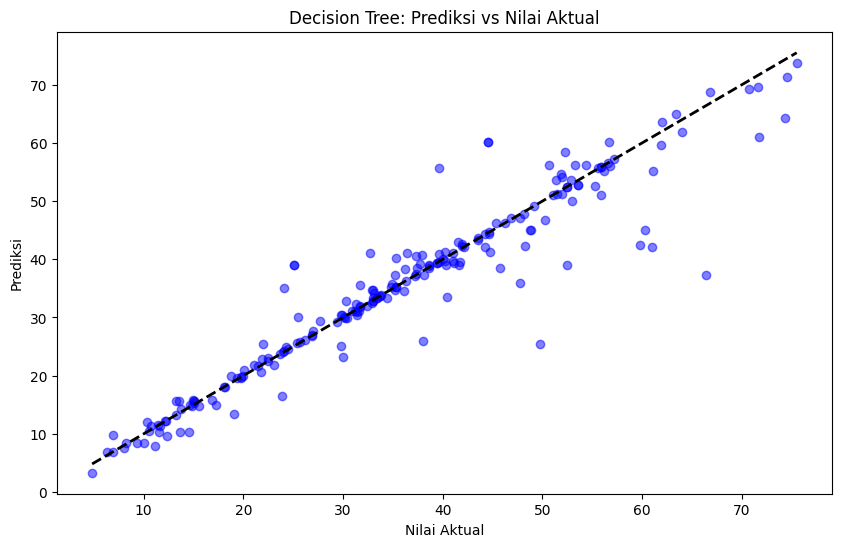

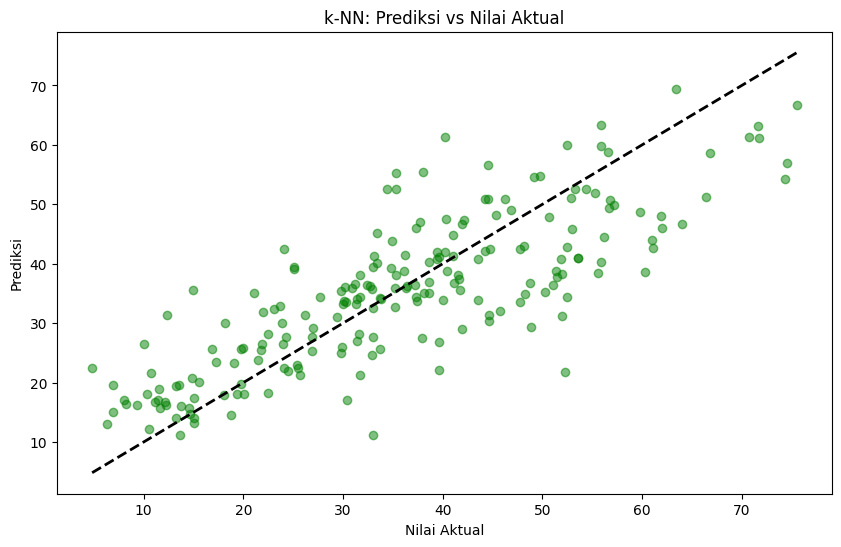

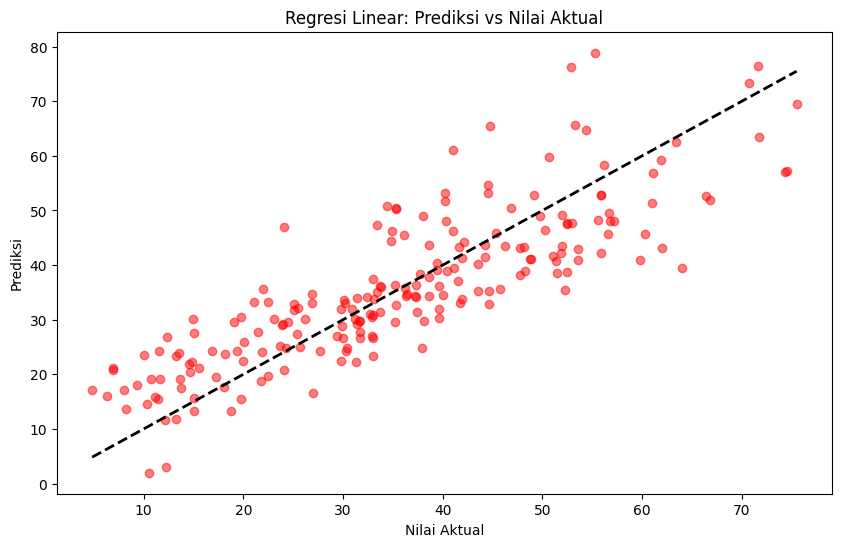

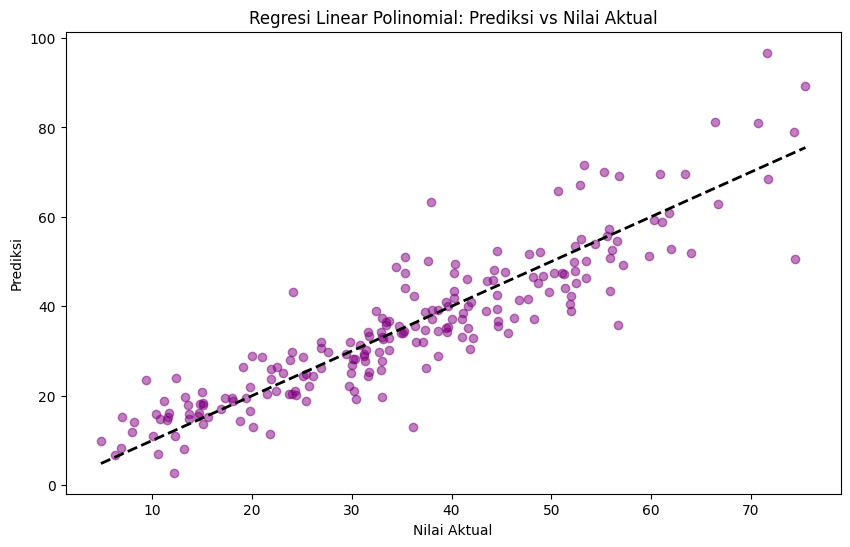

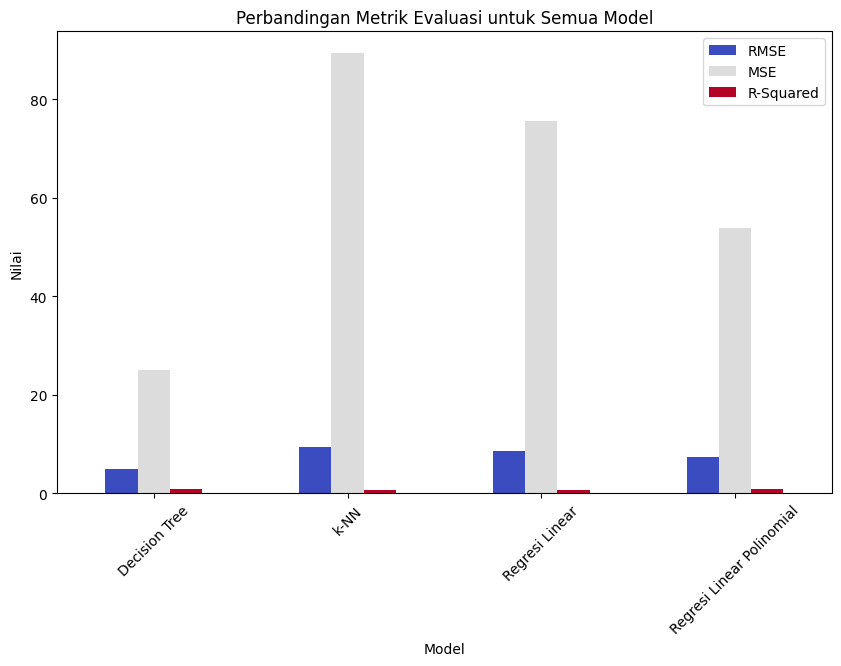

In [16]:
# Langkah 8: Visualisasi Hasil Prediksi vs Nilai Aktual

# Scatter plot untuk Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Decision Tree: Prediksi vs Nilai Aktual")
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi")
plt.show()

# Scatter plot untuk k-NN
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("k-NN: Prediksi vs Nilai Aktual")
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi")
plt.show()

# Scatter plot untuk Regresi Linear Biasa
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Regresi Linear: Prediksi vs Nilai Aktual")
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi")
plt.show()

# Scatter plot untuk Regresi Linear Polinomial
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear_poly, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Regresi Linear Polinomial: Prediksi vs Nilai Aktual")
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi")
plt.show()

# Visualisasi Metrik Evaluasi (RMSE, MSE, R-Squared)
metrics = pd.DataFrame({
    'Model': ['Decision Tree', 'k-NN', 'Regresi Linear', 'Regresi Linear Polinomial'],
    'RMSE': [rmse_tree, rmse_knn, rmse_linear, rmse_linear_poly],
    'MSE': [mse_tree, mse_knn, mse_linear, mse_linear_poly],
    'R-Squared': [r2_tree, r2_knn, r2_linear, r2_linear_poly]
})

# Bar chart untuk perbandingan RMSE, MSE, dan R-Squared
metrics.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title("Perbandingan Metrik Evaluasi untuk Semua Model")
plt.ylabel("Nilai")
plt.xticks(rotation=45)
plt.show()

In [17]:
# Langkah 9: Cetak hasil evaluasi
print("Evaluasi Decision Tree:")
print(f"RMSE: {rmse_tree}, MSE: {mse_tree}, R-Squared: {r2_tree}")

print("\nEvaluasi k-NN:")
print(f"RMSE: {rmse_knn}, MSE: {mse_knn}, R-Squared: {r2_knn}")

print("\nEvaluasi Regresi Linear biasa:")
print(f"RMSE: {rmse_linear}, MSE: {mse_linear}, R-Squared: {r2_linear}")

print("\nEvaluasi Regresi Linear dengan Basis Fungsi (Polinomial):")
print(f"RMSE: {rmse_linear_poly}, MSE: {mse_linear_poly}, R-Squared: {r2_linear_poly}")

Evaluasi Decision Tree:
RMSE: 5.014400040582152, MSE: 25.144207766990288, R-Squared: 0.9024196258297741

Evaluasi k-NN:
RMSE: 9.45313347751365, MSE: 89.36173254368931, R-Squared: 0.6532023844648411

Evaluasi Regresi Linear biasa:
RMSE: 8.690748067681875, MSE: 75.52910197591626, R-Squared: 0.7068844602363367

Evaluasi Regresi Linear dengan Basis Fungsi (Polinomial):
RMSE: 7.341729040392788, MSE: 53.90098530254681, R-Squared: 0.7908194856363161
